# Load Libraries & Data

In [13]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("1000_Companies.csv")  # replace with your file path

# Quick look
print(df.head())
print(df.info())
print(df.describe())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None
           R&D Spend  Administration  Marketing Spend         Profit
count    1000.000000     1000.00

# Data Cleaning

In [17]:
# Missing values
print(df.isnull().sum())

# Drop rows with missing Profit
df = df.dropna(subset=['Profit'])

# Fill missing numeric values with median instead of dropping
num_cols = ['R&D Spend','Administration','Marketing Spend']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())
    
# Fill missing categorical columns with mode
df['State'] = df['State'].fillna(df['State'].mode()[0])

# Remove duplicates
df = df.drop_duplicates()

# Remove only truly invalid negative values if needed
df = df[(df['R&D Spend']>=0) & (df['Administration']>=0) & (df['Marketing Spend']>=0)]
 
print(df.info())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 
 4   Profit           999 non-null    float64
dtypes: float64(4), object(1)
memory usage: 46.8+ KB
None


In [19]:
# Save the cleaned DataFrame to a new CSV
df.to_csv("1000_Companies_Cleaned.csv", index=False)

# Check the file
df_cleaned = pd.read_csv("1000_Companies_Cleaned.csv")
print(df_cleaned.head())
print(df_cleaned.info())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 
 4   Profit           999 non-null    float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB
None


# Exploratory Data Analysis (EDA)

           R&D Spend  Administration  Marketing Spend         Profit
count     999.000000      999.000000       999.000000     999.000000
mean    81666.060260   122963.920218    226199.372097  119544.460404
std     46560.789116    12620.245535     91624.086386   42910.081882
min         0.000000    51283.140000         0.000000   14681.400000
25%     43081.000000   116639.540300    150727.914400   85909.667605
50%     79898.000000   122417.624700    224192.766100  117637.622000
75%    124593.000000   129141.554800    308485.022450  155635.604950
max    165349.200000   321652.140000    471784.100000  476485.430000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        999 non-null    float64
 1   Administration   999 non-null    float64
 2   Marketing Spend  999 non-null    float64
 3   State            999 non-null    object 

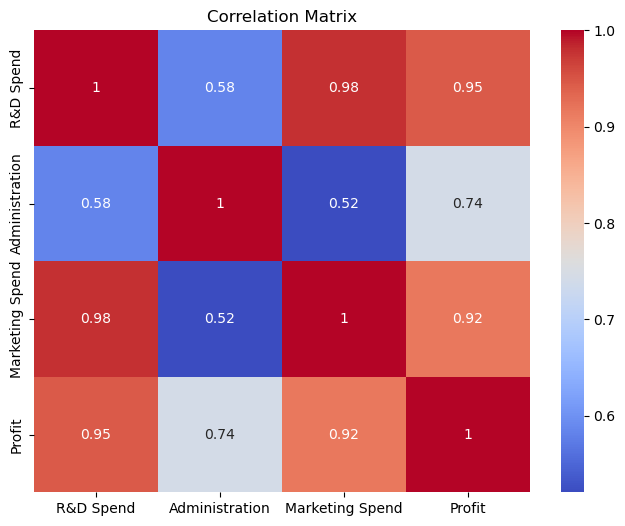

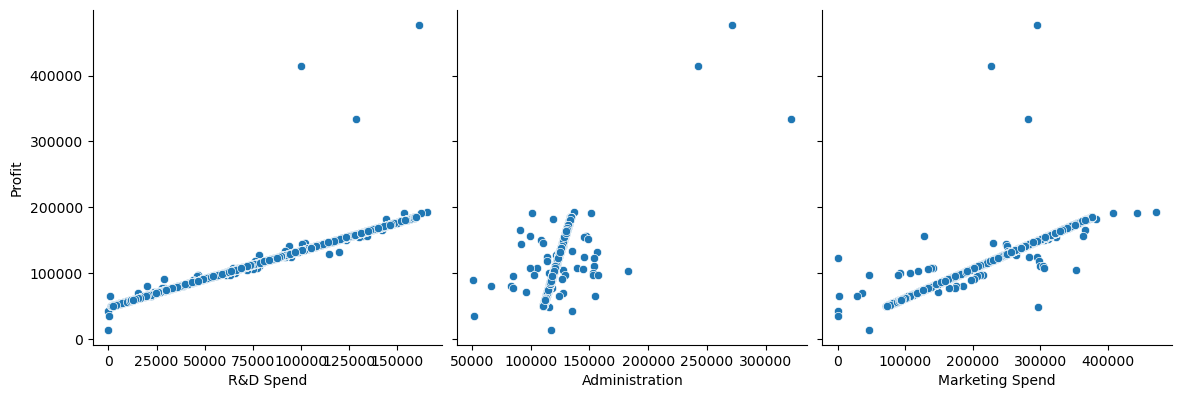

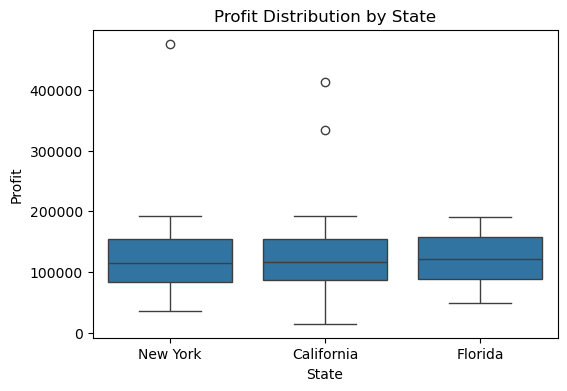

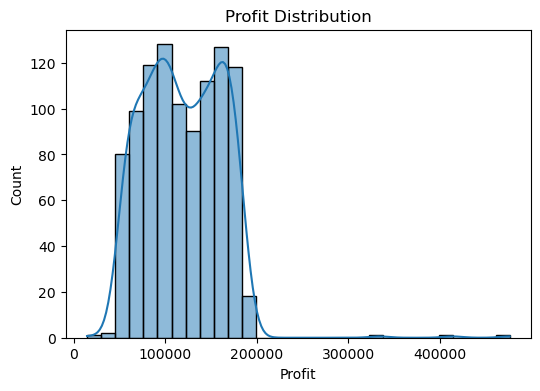

State
California    119360.961837
Florida       120556.909766
New York      118756.829609
Name: Profit, dtype: float64


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1️ Quick stats
print(df_cleaned.describe())
print(df_cleaned.info())

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correlation heatmap
numeric_df = df_cleaned.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.savefig("eda_correlation_heatmap.png", bbox_inches='tight')
plt.show()

# Scatter plots
sns.pairplot(df_cleaned, x_vars=['R&D Spend','Administration','Marketing Spend'],
             y_vars='Profit', height=4, kind='scatter')
plt.savefig("eda_scatterplots.png", bbox_inches='tight')
plt.show()

# Boxplot for State
plt.figure(figsize=(6,4))
sns.boxplot(x='State', y='Profit', data=df_cleaned)
plt.title("Profit Distribution by State")
plt.savefig("eda_boxplot_state.png", bbox_inches='tight')
plt.show()

# Distribution of Profit
plt.figure(figsize=(6,4))
sns.histplot(df_cleaned['Profit'], kde=True, bins=30)
plt.title("Profit Distribution")
plt.savefig("eda_profit_distribution.png", bbox_inches='tight')
plt.show()

# Summary of mean Profit by State
print(df_cleaned.groupby('State')['Profit'].mean())

# Preprocessing

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1️ Separate features and target
X = df_cleaned.drop('Profit', axis=1)  # all columns except Profit
y = df_cleaned['Profit']               # target

# 2️ One-hot encode categorical columns (State)
X = pd.get_dummies(X, columns=['State'], drop_first=True)

# 3️ Scale numeric features (optional, recommended for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4️ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 5️ Optional: check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (799, 5)
X_test shape: (200, 5)
y_train shape: (799,)
y_test shape: (200,)


# Regression Modeling

In [25]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# -------------------------------
# 1️ Linear Regression
# -------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr.predict(X_test)

# Evaluate
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results")
print("-------------------------")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.2f}\n")


# -------------------------------
# 2️ Ridge Regression
# -------------------------------
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

print("Ridge Regression Results")
print("------------------------")
print(f"R²: {r2_score(y_test, y_pred_ridge):.2f}\n")


# -------------------------------
# 3️ Lasso Regression
# -------------------------------
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

print("Lasso Regression Results")
print("------------------------")
print(f"R²: {r2_score(y_test, y_pred_lasso):.2f}\n")


# -------------------------------
# 4️ Random Forest Regressor
# -------------------------------
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression Results")
print("-------------------------------")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.2f}")

Linear Regression Results
-------------------------
RMSE: 5059.59
R²: 0.98

Ridge Regression Results
------------------------
R²: 0.98

Lasso Regression Results
------------------------
R²: 0.98

Random Forest Regression Results
-------------------------------
RMSE: 1032.91
R²: 1.00


# Feature Importance

Feature Importance Table:

           Feature  Importance
0        R&D Spend    0.856300
1   Administration    0.118693
2  Marketing Spend    0.024597
4   State_New York    0.000405
3    State_Florida    0.000005


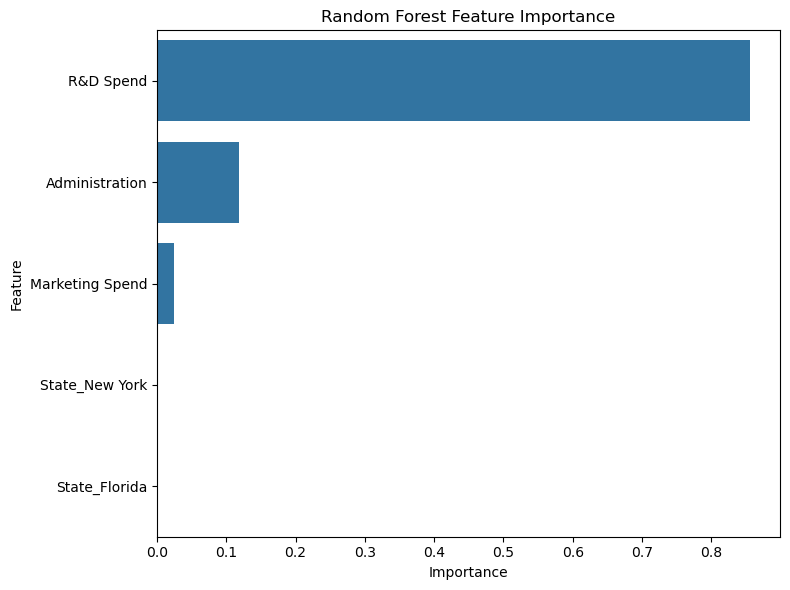

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️ Get feature names after one-hot encoding
feature_names = X.columns

# 2️ Get feature importances from Random Forest
importances = rf.feature_importances_

# 3️ Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importance Table:\n")
print(importance_df)

# 4️ Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Random Forest Feature Importance")
plt.tight_layout()

# Save plot as PNG
plt.savefig("feature_importance.png", bbox_inches='tight')

# Show plot in notebook
plt.show()